# Problem set 1: Solving the consumer problem

In this first problem set, we will take a look at solving the canonical utility maximization problem for the consumer.  

**Problem set structure:** 
* Each problem set consists of tasks and problems. _Tasks_ train you in using specific techniques, while _problems_ train you in solving actual economic problems. 
* Each problem set also contains solutions, which can be found in separate Python files.
* The Python files `A[..].py` do not run out of the box. But you can copy the code into your notebook or user module. 
* *You should really try to solve the tasks and problems on your own before looking at the answers!* 
* You goal should, however, not be to write everything from scratch. 
* Finding similar code from the lectures and adjusting it is completely ok. I rarely begin  completely from scratch, I figure out when I last did something similar and copy in the code to begin with. A quick peak at the solution, and then trying to write the solution yourself is also a very beneficial approach.

**Multiple solutions:** Within the field of numerical analysis there is often many more than one way of solving a specific problem. So the solution provided is just one example. If you get the same result, but use another approach, that might be just as good (or even better).

**Extra problems:** Solutions to the extra problems are not provided, but we encourage you to take a look at them if you have the time.

# Tasks

## Functions

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

**Answer:**

I implement the above function with $x_1$ and $x_2$ as positional arguments and $\alpha$ and $\beta$ as keyword arguments (fixed).

In [16]:
#  Define the function
def u(x1, x2, alpha = 0.5, beta = 1):

    # Return the output
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

## Print

In [17]:
# Define two vectors of values for x1 and x2
x1_vec = [1.05,1.3,2.3,2.5,3.1]

x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

**Answer:**

In [18]:
def print_table(x1_vec,x2_vec):
    
    ## a. Empty text

    # Define a string variable 'text'
    text = ''
    
    ## b. Top header

    # Add 3 left-hand (LH) spaces to 'text'
    text += f'{"":3s}'

    # Create top header
    for j, x2 in enumerate(x2_vec):
      # Add j = 0, 1, 2, 3, 4 and 6 LH spaces
       text += f'{j:6d}'
    # Create a new line
    text += '\n'
    
    # c. Body
    for i, x1 in enumerate(x1_vec):
      # If i > 0 create a new line
      if i > 0:
        text += '\n'
      # Add i = 0, 1, 2, 3, 4  and 3 LH spaces  
      text += f'{i:3d}'
      
      # Add the function values
      for j, x2 in enumerate(x2_vec):
        text += f'{u(x1,x2):6.3f}'

    # d. Print
    print(text) 

print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0 1.050 1.162 1.442 1.479 1.569
  1 1.162 1.300 1.661 1.711 1.832
  2 1.442 1.661 2.300 2.396 2.641
  3 1.479 1.711 2.396 2.500 2.768
  4 1.569 1.832 2.641 2.768 3.100


## Matplotlib

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

**Answer:**

Since `seaborn-whitegrid` is depreciated I use `'seaborn-v0_8-notebook`. 

To view a list of styles use `print(plt.style.available)`.

In [19]:
## import plot modules
import numpy as np

# Display plots directly in the Jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-notebook')

from mpl_toolkits.mplot3d import Axes3D

# Import colormaps
from matplotlib import cm

List of styles:

In [20]:
# print(plt.style.available)

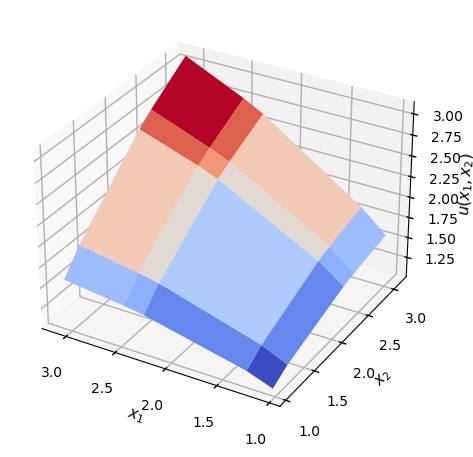

In [21]:
# Evaluate the utility function
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec, indexing='ij')
u_grid = u(x1_grid, x2_grid)

# Create figure 
fig = plt.figure()

# Add subplot with 1 row, 1 column, 1 index and with 3d projection
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Add values of x1, x2 and u to the plot with a colormap
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap = cm.coolwarm)

# Add labels to the plot
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u(x_1,x_2)$')

# Invert axis
ax.invert_xaxis()

# Show plot
plt.show();

## Optimize

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Solve this problem and illustrate your results.

**Answer:**

Solution using grid-search:

In [22]:
import numpy as np

## a. Define the function
def f(x):
    # Use numpy for sin function
    return np.sin(x) + 0.05*x**2

## b. Find the solution by using a loop

# Define a variable for the size of the array - adjust for a more precise solution
N = 100

# Create a numpy-array with size N
x_vec = np.linspace(-10, 10, N)

# Create a empty numpy-array with size N
f_vec = np.empty(N)

## Create variables to initialize and store solutions
# Initial maximum function value
f_best = np.inf

# Initial x value nan = 'not-a-number'
x_best = np.nan

# Create a grid-search
for i, x in enumerate(x_vec):
    # Initialize the search and add the current solution to f_vec
    f_now = f_vec[i] = f(x)

    # If the inequality is met update x_best and f_best
    if f_now < f_best: 
        x_best = x
        f_best = f_now

## d. Print
print(f'The optimal solution given the grid-search is x = {x_best:.3f} such that f(x) = {f_best:.3f}')


The optimal solution given the grid-search is x = -1.515 such that f(x) = -0.884


Solution using scipy optimize:

In [23]:
## c. Solution using scipy optimize
from scipy import optimize

# Set initial guess
x_guess = 0 

# Set objective function
objective_function = lambda x: f(x)

# Find the result by using scipy optimize. Default method is BFGS (a type of Newton-Raphson algorithm).
res = optimize.minimize(objective_function, x0 = x_guess, method = 'BFGS')

## Create variables to store the result
# Result for x
x_best_scipy = res.x[0] # x[i] where i is 0 for one variable and 1, 2, 3...N for more

# Result for the function value given x
f_best_scipy = res.fun

## d. print
print(f'The optimal solution given the optimizer is x = {x_best_scipy:.3f} such that f(x) = {f_best_scipy:.3f}')

The optimal solution given the optimizer is x = -1.428 such that f(x) = -0.888


Create figure:

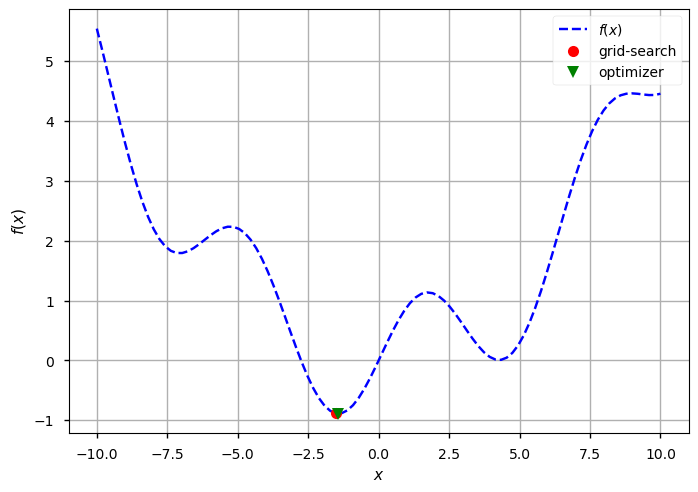

In [24]:
## e. Figure
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Add subplot with 1 row, 1 column and 1 index
ax = fig.add_subplot(1, 1, 1)

# Add values of x1 and x2 the plot
ax.plot(x_vec, f_vec, '--', color = 'blue', label = '$f(x)$') 

## Add solutions to the plot
# Grid-search solution
ax.plot(x_best, f_best, 'o', markersize = 8, color ='red', label = 'grid-search')

# optimizer solution
ax.plot(x_best_scipy, f_best_scipy, 'v', markersize = 8, color ='green', label = 'optimizer')

# Add labels to the plot
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# Add grid and legend to the plot
ax.grid(True)
ax.legend(loc='upper right')

# Show plot
plt.show();


# Problem

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

You can use the following functions:

In [25]:
def utility_function(x,alpha):
    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now
    return u
    
def expenditures(x,p):
    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def print_solution(x,alpha,I,p):    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. Utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. Expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. Expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

You can initially use the following parameter choices:

In [26]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

## Solutions using loops

**Answer:**

Solving with a loop:

In [27]:
# Set the number of points in each dimension
N = 15

# Create a numpy-array/vector with values between 0 and 1
fac = np.linspace(0, 1, N)

# Set maximum x
x_max = I/p

## Create variables to initialize and store solutions
# Initial minimum function value
u_best = -np.inf

# Initial x values/empty array
x_best = np.empty(5)

# Solve using a loop
for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    # Define x and expenditures
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    E = expenditures(x,p)
                    # If the expenditures are less than income evaluate the utility
                    if E <= I:
                        u_now = utility_function(x,alpha)
                        # If the inequality is met update x_best and u_best
                        if u_now > u_best:
                            x_best = x
                            u_best = u_now


# Print the solution
print_solution(x_best, alpha, I, p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


Solving with itertools:

In [28]:
import itertools as it

# Set the number of points in each dimension
N = 15

# Create a numpy-array/vector with values between 0 and 1
fac = np.linspace(0, 1, N)

# Set maximum x
x_max = I/p

## Create variables to initialize and store solutions
# Initial minimum function value
u_best = -np.inf

# Initial x values/empty array
x_best = np.empty(5)

# For x in the cartesian product (all combinations) of the linear spaces 
for x in it.product(fac, fac, fac, fac, fac):
    # Define x and expenditures
    x *= x_max
    E = expenditures(x,p)
    if E <= I:
        u_now = utility_function(x,alpha)
        # If the inequality is met update x_best and u_best
        if u_now > u_best:
            x_best = x
            u_best = u_now

# Print the solution
print_solution(x_best, alpha, I, p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


## Solutions using solvers

Solving with a constrained optimizer:

In [29]:
from scipy import optimize

## a. Constraints, bounds and initial guess
# Set constraints
constraints = ({'type': 'ineq', 'fun': lambda x: I-expenditures(x,p)})

# Set bounds
bounds = [(0, I/p_now) for p_now in p]

# Set a feasible initial guess
initial_guess = (I/p)/6

## b. Call optimizer and check if terminated correctly 
# Call optimizer
res = optimize.minimize(lambda x: -utility_function(x, alpha), x0=initial_guess,
                        method = 'SLSQP', bounds = bounds, constraints = constraints)

# Check termination
print(res.message) # check that the solver has terminated correctly

## c. Print result
print_solution(res.x, alpha, I, p)

Optimization terminated successfully
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


Solving with an unconstrained optimizer:

In [30]:
from scipy import optimize

## a. Define the objective function
def unconstrained_objective(x,alpha,I,p):
    
    # Set initial penalty to 0
    penalty = 0

    # Call expenditures
    E = expenditures(x,p)

    # Penalize if expenditures are more or equal to income
    if E >= I:
        ratio = I/E

        # Decrease x
        x *= ratio #

        # Increase penalty
        penalty = 1000*(E-I)**2
    
    # Call the utility function
    u = utility_function(x,alpha)

    # Return -u (minimization) + penalty (as we minimize)
    return -u + penalty 

## b. Set a feasible initial guess
initial_guess = (I/p)/6


## c. Call optimizer and check if terminated correctly 
# Call optimizer with arguments (alpha, I and p), options: maximum iterations 5000, and tolerence 1e-10
res = optimize.minimize(unconstrained_objective, x0 = initial_guess, method = 'Nelder-Mead',
                        args = (alpha, I, p), options = {'maxiter': 5000}, tol = 1e-10)

# Check termination
print(res.message)

## d. print result
print_solution(res.x,alpha,I,p)   

Optimization terminated successfully.
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility $u_0$, and price-vector $p=(p_1,p_2)$,

$$
\begin{aligned}
E(p_{1},p_{2},u_0) & = \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq u_0 \\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3. 